In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq



In [2]:
class RUN:
    def __init__(self, runnumber, confignumber):
        self.runnumber="%05d"%(int(runnumber))
        self.config = "%03d"%(int(confignumber))
        

Fitting function for guass error

In [3]:
def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b

Small Function to get Wavefrom data from an entry in a runlist 

In [11]:
def GetWaveform(RL_entry,wavenumber=11):
    DF=pd.DataFrame()
    Lineone=""
    dirpath = "data/waveforms/%s/%s-%s%05d"%(int(RL_entry["Date"]),int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]))
    #print(dirpath)
    if os.path.exists(dirpath):
        file="%s-%s%05d*%d.csv"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]),wavenumber)    
        flist=glob.glob(dirpath+"/"+file)        
        filename = flist[-1]#dirpath + "/" + file 
        #print(filename)
        if os.path.exists(filename):
            DF=pd.read_csv(filename,skiprows=[1])
            ofile=open(filename)
            Lineone = ofile.readlines()[1]
        else:
            print("Try new waveform")
            print(glob.glob(dirpath + "/*"))
        for name in DF.keys():
            if "(2)" in name:    
                DF=DF.rename(columns={name:name.replace(" (2)","")},errors="raise")
        #print(DF.keys())
        units = Lineone.split(",")
        for i,unit in enumerate(units):
            if "(V)" in unit:               
                DF[DF.keys()[i]]=DF[DF.keys()[i]]*1000


    else:
        print("Try New Run")
        print(dirpath)
    return DF


In [27]:
GetWaveform(Runlist_q.iloc[1])

,Time,Channel Trigger,Channel Cathode,Channel Anode,Average Anode,Average Cathode
0,-10.008000,0.0,53.90625,26.84855,21.74298000,49.65411
1,-10.004000,0.0,53.11269,26.06115,21.82379000,49.69918
2,-10.000000,0.0,53.11269,26.06115,21.81931000,49.69926
3,-9.996000,0.0,53.11269,25.27067,21.80140000,49.73516
4,-9.992000,0.0,53.11269,25.27067,21.71171000,49.74882
...,...,...,...,...,...,...
12498,39.983999,0.0,17.43971,58.43996,44.93238000,18.89423
12499,39.987999,0.0,17.43971,58.43996,44.96386000,18.82673
12500,39.991999,0.0,16.64616,59.22736,44.90544000,18.90769
12501,39.995999,0.0,17.43971,60.01783,45.02668000,18.85357


In [120]:
run1.config

'000'

Read in the runlist store as a Dataframe named Runlist

In [8]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])


In [9]:
Runlist[-2:]

,RN,Date,Config Number,Run Number,Configuration,type,Anode Voltage,Cathode Voltage,Laser Current,Laser Frequency,...,Target Pressure,TC1(K),TC2(K),TC3(K),Drift Length,Filepath (GDrive),Filepath (ODrive),Filepath (server),window(us),Notes
111,112.0,20240524.0,131.0,112.0,SingleGrid_20mm,Production,50.0,600.0,24.0,3456.0,...,20.5,294.0,294.0,294.0,NaN,NaN,NaN,NaN,50.0,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Build a shorter runlist with a query: Take that short run list and plot a few average waveforms

In [29]:
Runlist_q = Runlist.query("RN >= 46 & RN <= 56")
Runlist_q

,RN,Date,Config Number,Run Number,Configuration,type,Anode Voltage,Cathode Voltage,Laser Current,Laser Frequency,...,Target Pressure,TC1(K),TC2(K),TC3(K),Drift Length,Filepath (GDrive),Filepath (ODrive),Filepath (server),window(us),Notes
45,46.0,20240522.0,131.0,46.0,SingleGrid_20mm,Production,200.0,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
46,47.0,20240522.0,131.0,47.0,SingleGrid_20mm,Production,190.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
47,48.0,20240522.0,131.0,48.0,SingleGrid_20mm,Production,180.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
48,49.0,20240522.0,131.0,49.0,SingleGrid_20mm,Production,170.6,74.6,27.0,789.0,...,16.01,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
49,50.0,20240522.0,131.0,50.0,SingleGrid_20mm,Production,160.4,74.6,27.0,789.0,...,16.01,294.4,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
50,51.0,20240522.0,131.0,51.0,SingleGrid_20mm,Production,150.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
51,52.0,20240522.0,131.0,52.0,SingleGrid_20mm,Production,140.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
52,53.0,20240522.0,131.0,53.0,SingleGrid_20mm,Production,130.2,74.6,27.0,789.0,...,16.03,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
53,54.0,20240522.0,131.0,54.0,SingleGrid_20mm,Production,120.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
54,55.0,20240522.0,131.0,55.0,SingleGrid_20mm,Production,110.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN


56.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         42.81496       42.63041       31.75249   

   Average Cathode  
1         37.56602  
55.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         33.29847       36.31274       31.76777   

   Average Cathode  
1         38.40388  
54.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         47.57013       53.67864       30.85797   

   Average Cathode  
1          37.9588  
53.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0          26.9562       20.52165       30.20108   

   Average Cathode  
1         38.12648  
52.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         39.64074       33.15699       29.12043   

   Average Cathode  
1         3

Text(92.09722222222221, 0.5, 'Preamp Signal [mV]')

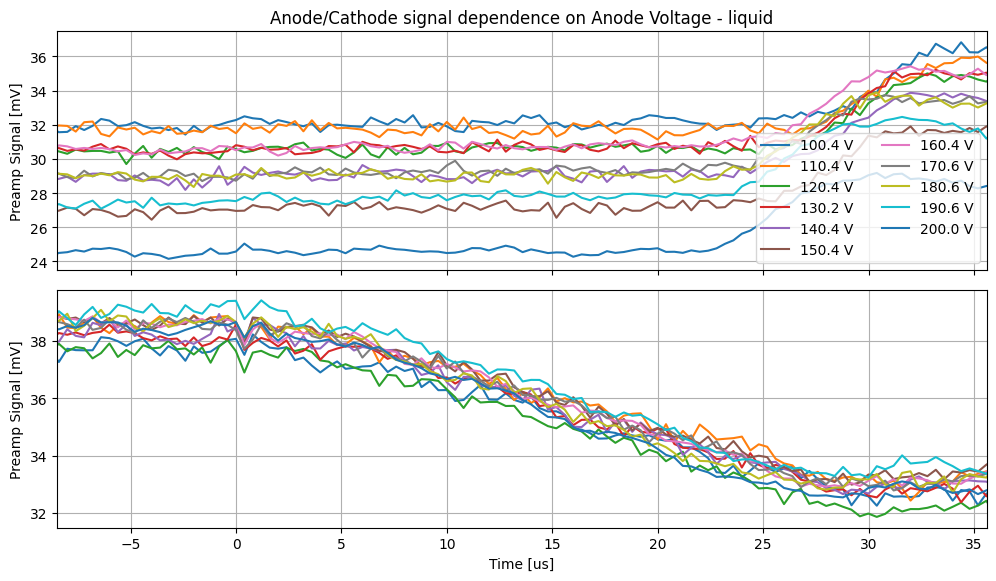

In [32]:

fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Anode Voltage"
unit ="V"

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF[1:2])
    
    steps=100

    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    try:
        plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"], fmt ="", label="%s %s"%(entry[Label], unit) )
        plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"], fmt ="", label="%s %s"%(entry[Label], unit) )
    except:
        print("Iissue with run ", i)
        break
    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal dependence on %s - liquid"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-8.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

Runs 38-42 Cathode dependence for cold gas

42
41
40
39
38


Text(80.47222222222221, 0.5, 'Preamp Signal [mV]')

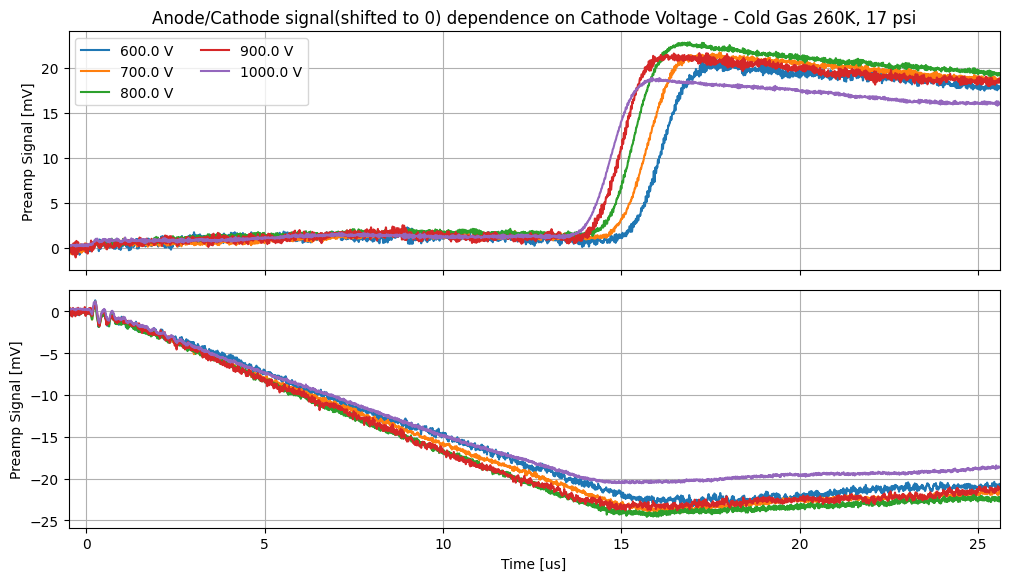

In [169]:
Runlist_q = Runlist.query("RN >= 38 & RN <= 42")
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF[1:2])
    
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)

    norm_amp_anode=np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Cold Gas 260K, 17 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,25.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


69.0
68.0
67.0
66.0
65.0
64.0
63.0


Text(80.47222222222221, 0.5, 'Preamp Signal [mV]')

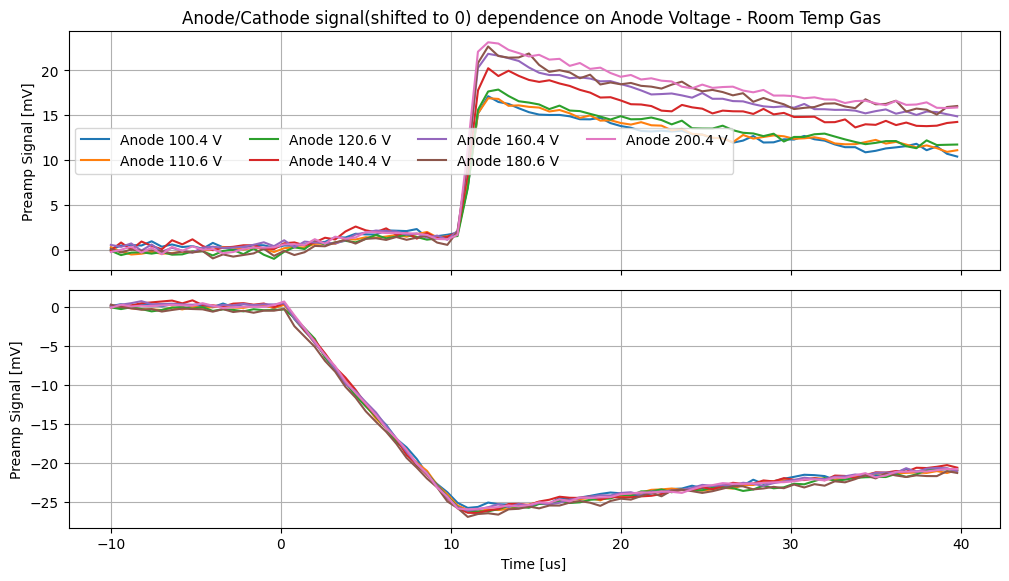

In [57]:
Runlist_q = Runlist.query("RN >= 63 & RN <= 69")
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]
steps=150
Label="Anode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF[1:2])
     
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)

    norm_amp_anode=np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"]-norm_amp_anode, fmt ="", label="Anode %s %s"%(entry[Label], unit ) )

    
    norm_amp_cathode=np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Room Temp Gas "%(Label))
plots[0].legend(ncol=4)

#plots[1].set_xlim(-5.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()
